# Filtros FIR e IIR

In [8]:
import pandas as pd
import numpy as np
import math
from scipy.fft import fft, ifft
import scipy.signal as sg
from statsmodels.graphics.tsaplots import plot_acf
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn")
sns.set(style="white")

## FIR3 de Hanning

## Aumentar la frecuencia de muestreo

In [44]:
dos_locales = pd.read_csv('./data/DosLocales.csv', index_col=0)

In [7]:
dos_locales.head(2)

,t,localA,localB
1,0,8.091315,8.918544
2,1,12.120929,13.347210


In [5]:
N = len(dos_locales.localA)

In [186]:
linear = interpolate.interp1d(dos_locales.t.values, dos_locales.localA.values)
spline = interpolate.CubicSpline(dos_locales.t.values, dos_locales.localA.values)
xnew = np.linspace(0,N-1,3*N)
localAfal = linear(xnew)
localAfas = spline(xnew)

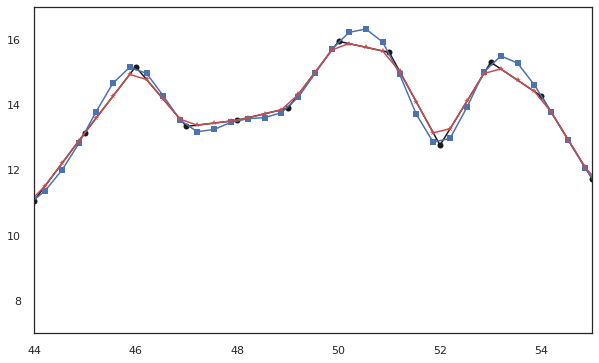

In [190]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(44,55)
ax.set_ylim(7,17)
plt.plot(dos_locales.t.values, dos_locales.localA.values, 'ko',
         dos_locales.t.values, dos_locales.localA.values, 'k',
         xnew, localAfas, 'bs',
         xnew, localAfas, 'b',
         xnew, localAfal, 'r*',
         xnew, localAfal, 'r')
plt.show()

In [177]:
fft_localA = np.abs(fft(dos_locales.localA.values))
fft_localAfal = np.abs(fft(localAfal))
fft_localAfas = np.abs(fft(localAfas))

tiempo = np.arange(N)
tiempo3 = np.linspace(0,N-1,3*N)

frecuencia_muestreo = 1
delta_frecuencia_muestreo = frecuencia_muestreo/N
frecuencia = [delta_frecuencia_muestreo*ti for ti in tiempo]

frecuencia_muestreo = 3
delta_frecuencia_muestreo = frecuencia_muestreo/(3*N)
frecuencia_interpolada = [delta_frecuencia_muestreo*ti for ti in tiempo3]

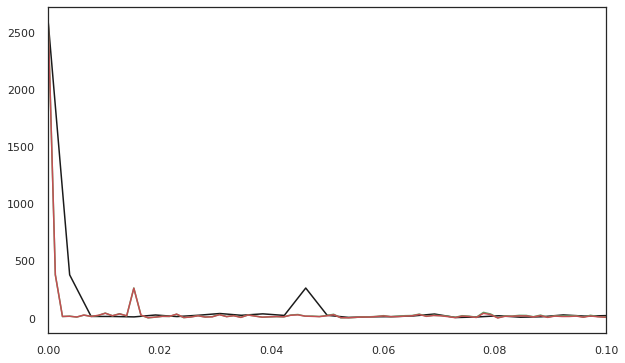

In [178]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0,0.1)
plt.plot(frecuencia, fft_localA, 'k',
         frecuencia_interpolada, fft_localAfas/3, 'g',
         frecuencia_interpolada, fft_localAfal/3, 'r')
plt.show()

## Disminuir la frecuencia de muestreo

In [188]:
linear = interpolate.interp1d(dos_locales.t.values, dos_locales.localA.values)
spline = interpolate.CubicSpline(dos_locales.t.values, dos_locales.localA.values)
xnew_low = np.linspace(0,N-1,int(N/3))
localAfal_low = linear(xnew_low)
localAfas_low = spline(xnew_low)

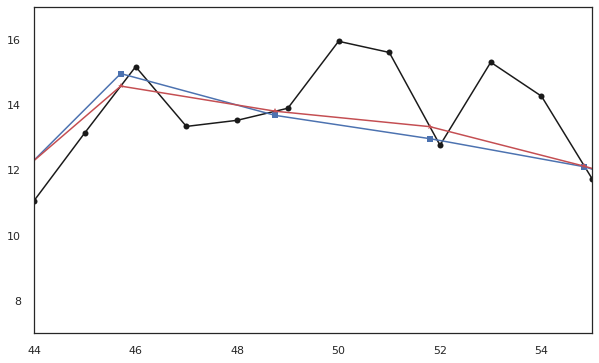

In [189]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(44,55)
ax.set_ylim(7,17)
plt.plot(dos_locales.t.values, dos_locales.localA.values, 'ko',
         dos_locales.t.values, dos_locales.localA.values, 'k',
         xnew_low, localAfas_low, 'bs',
         xnew_low, localAfas_low, 'b',
         xnew_low, localAfal_low, 'r*',
         xnew_low, localAfal_low, 'r')
plt.show()

In [193]:
fft_localA = np.abs(fft(dos_locales.localA.values))
fft_localAfal_low = np.abs(fft(localAfal_low))
fft_localAfas_low = np.abs(fft(localAfas_low))

tiempo_low = np.arange(N)
tiempo3_low = np.linspace(0,N-1,int(N/3))

frecuencia_muestreo = 1
delta_frecuencia_muestreo = frecuencia_muestreo/N
frecuencia_low = [delta_frecuencia_muestreo*ti for ti in tiempo_low]

frecuencia_muestreo = 1/3
delta_frecuencia_muestreo = frecuencia_muestreo/(int(N/3))
frecuencia_interpolada_low = [delta_frecuencia_muestreo*ti for ti in tiempo3_low]

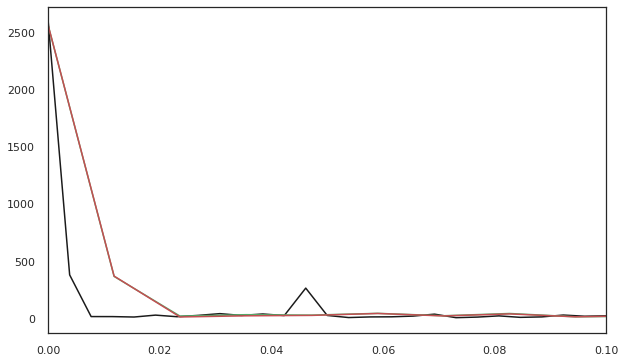

In [194]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0,0.1)
plt.plot(frecuencia_low, fft_localA, 'k',
         frecuencia_interpolada_low, 3*fft_localAfas_low, 'g',
         frecuencia_interpolada_low, 3*fft_localAfal_low, 'r')
plt.show()

## Disminuir la frecuencia de muestreo con filtrado pasa bajo

In [200]:
localAma = dos_locales.localA.rolling(window=7, center=True, min_periods=4).mean()
linear_pb = interpolate.interp1d(dos_locales.t.values, localAma)
spline_pb = interpolate.CubicSpline(dos_locales.t.values, localAma)
xnew_pb = np.linspace(0,N-1,int(N/3))
localAfal_pb = linear(xnew_pb)
localAfas_pb = spline(xnew_pb)

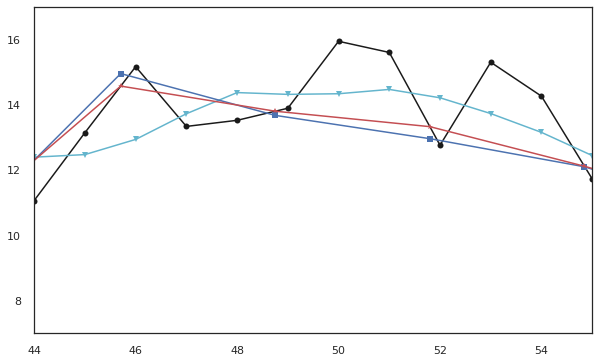

In [201]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(44,55)
ax.set_ylim(7,17)
plt.plot(dos_locales.t.values, dos_locales.localA.values, 'ko',
         dos_locales.t.values, dos_locales.localA.values, 'k',
         dos_locales.t.values, localAma, 'cv',
         dos_locales.t.values, localAma, 'c',
         xnew_pb, localAfas_pb, 'bs',
         xnew_pb, localAfas_pb, 'b',
         xnew_pb, localAfal_pb, 'r*',
         xnew_pb, localAfal_pb, 'r')
plt.show()

In [202]:
fft_localA = np.abs(fft(dos_locales.localA.values))
fft_localAfal_pb = np.abs(fft(localAfal_pb))
fft_localAfas_pb = np.abs(fft(localAfas_pb))

tiempo_pb = np.arange(N)
tiempo3_pb = np.linspace(0,N-1,int(N/3))

frecuencia_muestreo = 1
delta_frecuencia_muestreo = frecuencia_muestreo/N
frecuencia_pb = [delta_frecuencia_muestreo*ti for ti in tiempo_pb]

frecuencia_muestreo = 1/3
delta_frecuencia_muestreo = frecuencia_muestreo/(int(N/3))
frecuencia_interpolada_pb = [delta_frecuencia_muestreo*ti for ti in tiempo3_pb]

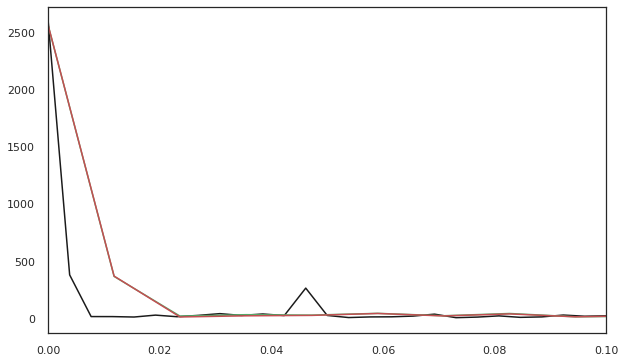

In [203]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0,0.1)
plt.plot(frecuencia_pb, fft_localA, 'k',
         frecuencia_interpolada_pb, 3*fft_localAfas_pb, 'g',
         frecuencia_interpolada_pb, 3*fft_localAfal_pb, 'r')
plt.show()

## Muestreo uniforme